## Importing required packages

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from collections import Counter
import warnings

## Retreive Data from source data set

In [331]:
data = pd.read_csv('/Users/Yashaswi/Desktop/CDS project/CDS_data.csv')

In [332]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Check for any missing values

In [333]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Drop the employee number column from data set

In [334]:
data=data.drop('EmpNumber',axis=1)  # This column will not make any contribution in prediction of Performance rating.

## Checking for correlation of predictor variables with the target

In [335]:
data.corrwith(data.PerformanceRating)

Age                            -0.040164
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
YearsWithCurrManager           -0.122313
PerformanceRating               1.000000
dtype: float64

In [336]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Convert the data from string to float --> called Data manipulation

In [337]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.Gender = enc.fit_transform(data.Gender)
data.EducationBackground = enc.fit_transform(data.EducationBackground)
data.MaritalStatus = enc.fit_transform(data.MaritalStatus)
data.EmpDepartment = enc.fit_transform(data.EmpDepartment)
data.EmpJobRole = enc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency = enc.fit_transform(data.BusinessTravelFrequency)
data.OverTime = enc.fit_transform(data.OverTime)
data.Attrition = enc.fit_transform(data.Attrition)

In [338]:
data.shape

(1200, 27)

## Fetching predictor(X) values and target(y) values from the data

In [339]:
X = data.drop('PerformanceRating',axis=1)
y=data.PerformanceRating

## Splitting data into training and testing set

In [340]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

## Using Random Forest 

### ML model implemented and fit to train with the training data set

In [341]:
rf_model = RandomForestClassifier(n_estimators=30,n_jobs=1,random_state=10,)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

### Predict the target with the test data set

In [342]:
y_pred = rf_model.predict(X_test)

### Check the prediction accuracy

In [343]:
print(accuracy_score(y_test,y_pred))

0.9388888888888889


In [344]:
Counter(y_test)

Counter({3: 281, 2: 49, 4: 30})

In [345]:
pd.crosstab(y_test,y_pred)  # HORIZONTAL represents Predicted ratings
                            # VERTICAL represents True ratings

col_0,2,3,4
PerformanceRating,,,
2,42,7,0
3,7,268,6
4,0,2,28


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D84AFA748>,
      dtype=object)

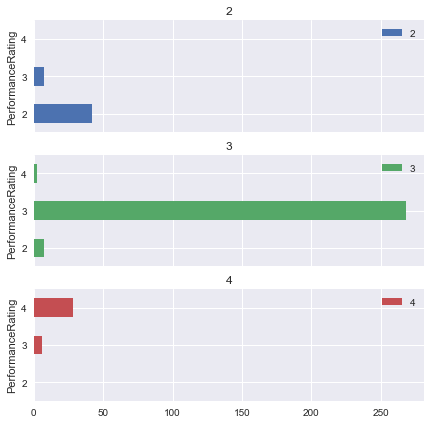

In [346]:
pd.crosstab(y_test,y_pred).plot(kind='barh',subplots=True,figsize=[7,7])